# Prétraitement des images 

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from os import listdir
from sklearn import preprocessing
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Import du dataset

In [3]:
path = "./Images/"
list_photos = [file for file in listdir(path)]
print(len(list_photos))
list_photos[0]

1050


'aa68675f50a0551b8dadb954017a50a1.jpg'

In [5]:
# Chargement du dataframe avec l'id du produit et sa catégorie
df = pd.read_csv('csv/text_clean.csv')
df.head(2)

,Unnamed: 0,uniq_id,product_name_clean,description_clean,main_category,main_category_num,description_name
0,0,55b85ea15a1536d46b7190ad6fff8ce7,elegance polyester multicolor abstract eyelet ...,key feature elegance polyester multicolor abst...,Home Furnishing,4,key feature elegance polyester multicolor abst...
1,1,7b72c92c2f6c40268628ec5f14c6d590,sathiyas cotton bath towel,specification cotton bath towel bath towel red...,Baby Care,0,specification cotton bath towel bath towel red...


In [6]:
df['image_path'] = df.uniq_id + '.jpg'
df.head(3)

,Unnamed: 0,uniq_id,product_name_clean,description_clean,main_category,main_category_num,description_name,image_path
0,0,55b85ea15a1536d46b7190ad6fff8ce7,elegance polyester multicolor abstract eyelet ...,key feature elegance polyester multicolor abst...,Home Furnishing,4,key feature elegance polyester multicolor abst...,55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,1,7b72c92c2f6c40268628ec5f14c6d590,sathiyas cotton bath towel,specification cotton bath towel bath towel red...,Baby Care,0,specification cotton bath towel bath towel red...,7b72c92c2f6c40268628ec5f14c6d590.jpg
2,2,64d5d4a258243731dc7bbb1eef49ad74,eurospa cotton terry face towel set,key feature cotton terry face towel set size s...,Baby Care,0,key feature cotton terry face towel set size s...,64d5d4a258243731dc7bbb1eef49ad74.jpg


## Affichage d'exemples d'images par label

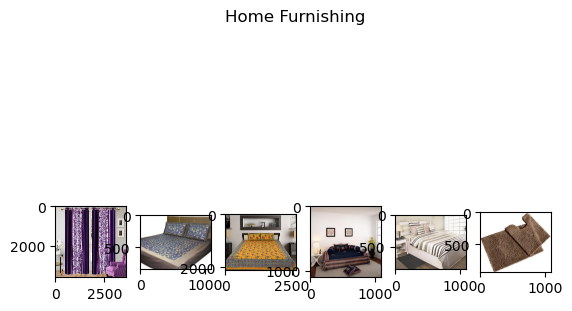

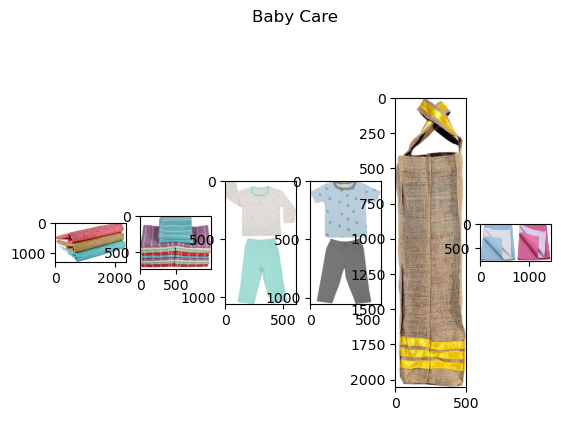

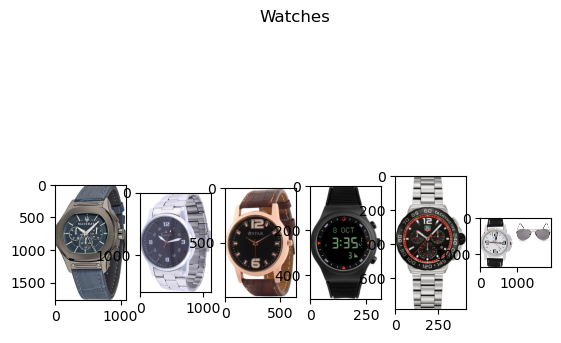

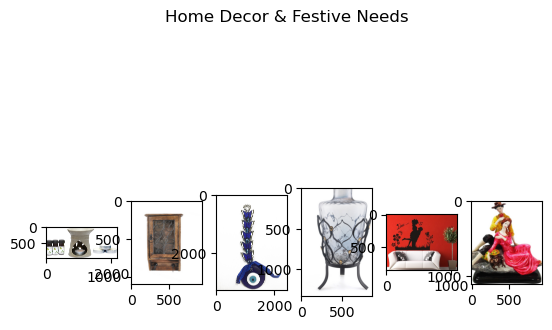

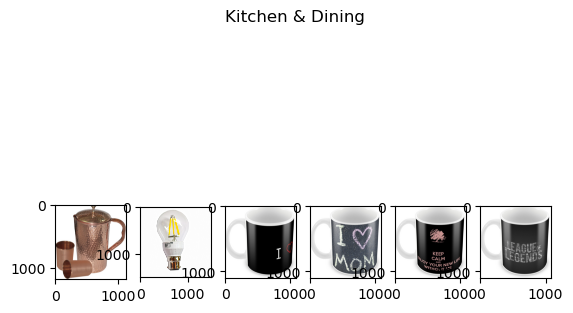

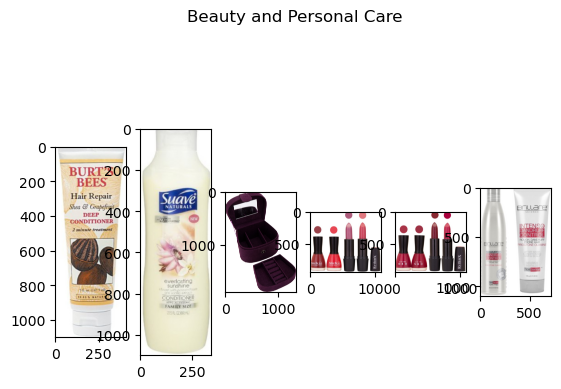

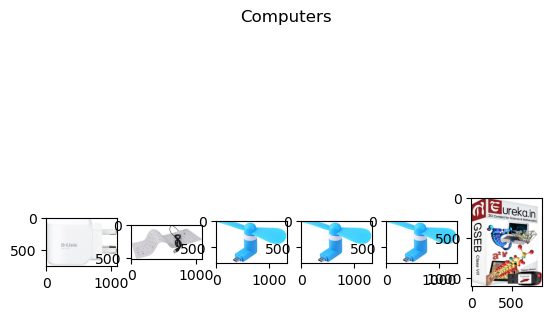

In [7]:
# Récupérer les noms de catégorie uniques dans le dataframe
categories = df['main_category'].unique()

# Boucle à travers ch£aque catégorie
for cat in categories:
    # Sélectionner les premières photos de cette catégorie
    photos = df.loc[df['main_category'] == cat]['image_path'][:6].tolist()
    
    # Créer un sous-plot de colonnes pour afficher les photos
    fig, axs = plt.subplots(1, 6)
    
    # Boucle à travers chaque photo et l'afficher dans le subplot correspondant
    for i, photo in enumerate(photos):
        img = plt.imread('./Images/'+photo)
        axs[i].imshow(img)
    
    # Définir le titre global du subplot
    fig.suptitle(cat)
    
    # Afficher le subplot
    plt.show()

## Détermination et affichage des descripteurs SIFT

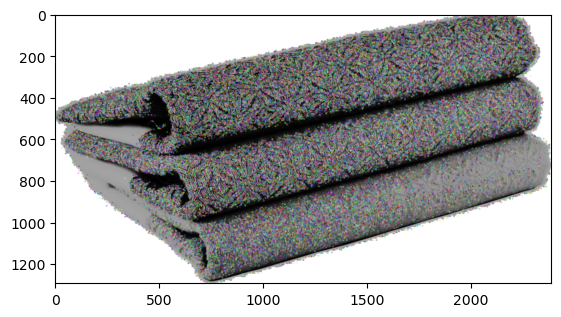

Descripteurs :  (47652, 128)
[[ 85. 113.  31. ...   0.   0.   0.]
 [ 29.  80.  73. ...   0.   0.   0.]
 [ 10.  67. 115. ...   0.   0.  22.]
 ...
 [  0.   0.   0. ...   0.   0.  13.]
 [ 40.   0.   0. ...   0.   0.  51.]
 [ 37.   1.   0. ...   0.   0.   0.]]


In [8]:
sift =  cv2.SIFT_create()
image = cv2.imread(path+df.image_path[1],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print(des)

# Pré-traitement des images via SIFT

In [9]:
# identification of key points and associated descriptors
sift_keypoints = []
temps1=time.time()
sift = cv2.SIFT_create()

for image_num in range(len(list_photos)):
    if image_num%100 == 0 : print(image_num)  
    image = cv2.imread(path+list_photos[image_num],0) 
    image = cv2.GaussianBlur(image, (5, 5), 0)
    equalized = cv2.equalizeHist(image)  
    kp, des = sift.detectAndCompute(equalized, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints, dtype=object)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")


0
100
200
300
400
500
600
700
800
900
1000
Nombre de descripteurs :  (6677601, 128)
temps de traitement SIFT descriptor :          1502.20 secondes


## Création des clusters de descripteurs

In [10]:
a = pd.DataFrame(sift_keypoints_all)
a

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,41.0,17.0,0.0,2.0,22.0,18.0,1.0,2.0,127.0,16.0,...,1.0,1.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,18.0,2.0,3.0,8.0,6.0,5.0,6.0,32.0,7.0,2.0,...,40.0,28.0,0.0,0.0,20.0,108.0,31.0,0.0,0.0,0.0
2,0.0,21.0,18.0,25.0,17.0,24.0,10.0,0.0,0.0,3.0,...,6.0,24.0,124.0,58.0,13.0,1.0,0.0,1.0,2.0,15.0
3,18.0,9.0,5.0,4.0,3.0,0.0,0.0,0.0,175.0,20.0,...,0.0,0.0,24.0,37.0,17.0,0.0,0.0,0.0,1.0,3.0
4,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,...,0.0,59.0,96.0,28.0,2.0,0.0,0.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6677596,1.0,61.0,119.0,23.0,22.0,7.0,0.0,0.0,21.0,121.0,...,25.0,1.0,0.0,1.0,16.0,17.0,60.0,86.0,39.0,0.0
6677597,93.0,37.0,0.0,0.0,0.0,10.0,80.0,48.0,95.0,69.0,...,21.0,31.0,57.0,65.0,46.0,5.0,0.0,0.0,0.0,3.0
6677598,44.0,22.0,37.0,25.0,11.0,2.0,5.0,20.0,80.0,79.0,...,0.0,25.0,22.0,19.0,36.0,20.0,3.0,2.0,2.0,2.0
6677599,70.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,115.0,0.0,...,26.0,0.0,3.0,49.0,84.0,4.0,0.0,2.0,16.0,4.0


In [11]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
#k=40
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  2584
Création de 2584 clusters de descripteurs ...


/opt/anaconda3/envs/tf_image/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


temps de traitement kmeans :           461.47 secondes


## Création des features des images

In [12]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :           102.91 secondes


## Réductions de dimension

In [13]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 2584)
Dimensions dataset après réduction PCA :  (1050, 745)


In [62]:
tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = df["main_category"]
print(df_tsne.shape)

(1050, 3)


In [63]:
df_tsne

,tsne1,tsne2,class
0,-15.645353,4.646766,Home Furnishing
1,-4.932622,-16.136431,Baby Care
2,-1.504441,-10.906846,Baby Care
3,-8.622428,5.698579,Home Furnishing
4,-8.686544,3.378522,Home Furnishing
...,...,...,...
1045,3.374428,-5.388634,Baby Care
1046,-13.915364,3.189756,Baby Care
1047,-4.695708,-7.372491,Baby Care
1048,7.350914,2.415838,Baby Care


## Analyse visuelle : affichage T-SNE selon catégories d'images

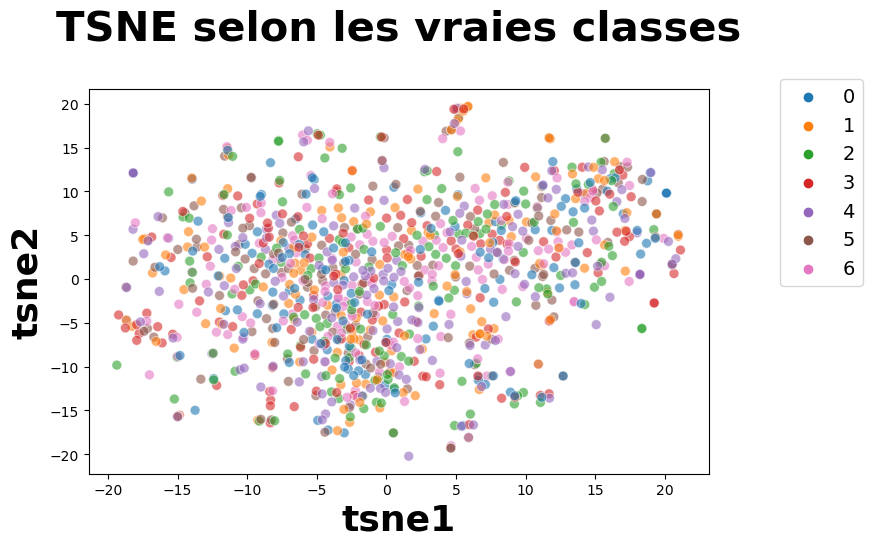

In [40]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14},bbox_to_anchor=(1.1, 1.05)) 

plt.show()

## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

In [41]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


/opt/anaconda3/envs/tf_image/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [42]:
df_tsne

,tsne1,tsne2,class,cluster
0,-15.645353,4.646766,4,0
1,-4.932622,-16.136431,0,3
2,-1.504441,-10.906846,0,3
3,-8.622428,5.698579,4,0
4,-8.686544,3.378522,4,0
...,...,...,...,...
1045,3.374428,-5.388634,0,3
1046,-13.915364,3.189756,0,0
1047,-4.695708,-7.372491,0,6
1048,7.350914,2.415838,0,4


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters

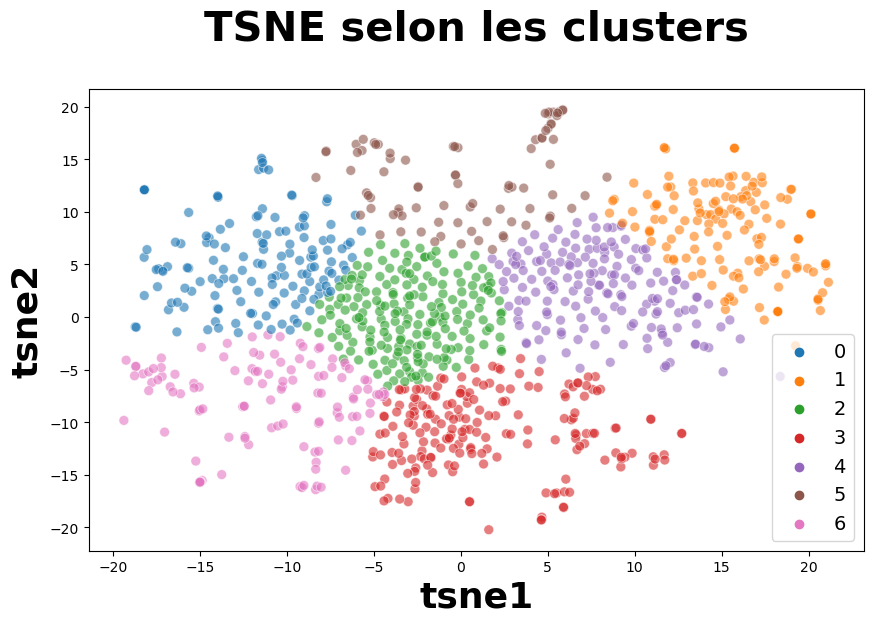

ARI :  0.0012961451642666765


In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = df["main_category_num"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

Le score ARI est très bas, ce qui signifie que les clusters ne sont pas fait correctement.

Note : ARI >= 0.90 excellent recovery; 0.80 =< ARI < 0.90 good recovery; 0.65 =< ARI < 0.80 moderate recovery; ARI < 0.65 poor recovery.

Le score ARI (Adjusted Rand Index) est une mesure de similarité entre deux groupes de données. Il est souvent utilisé pour évaluer la performance de l'apprentissage non supervisé, en particulier dans le clustering.

Le score ARI est basé sur la comparaison entre les classes d'origine (labels réels) et les classes prédites (labels estimés) d'un modèle de clustering. Il mesure la similitude entre ces deux ensembles de classes en prenant en compte à la fois les associations correctes et incorrectes.

Le score ARI est une valeur comprise entre -1 et 1, où une valeur de 1 indique une correspondance parfaite entre les classes d'origine et les classes prédites, une valeur de 0 indique une correspondance aléatoire et une valeur négative indique une correspondance pire que la correspondance aléatoire.

In [44]:
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, v_measure_score, fowlkes_mallows_score

# Calcul du Silhouette Score
silhouette = silhouette_score(X_tsne, cls.labels_)

# Calcul de l'homogénéité, de la complétude et de la V-mesure
homogeneity = homogeneity_score(labels, cls.labels_)
completeness = completeness_score(labels, cls.labels_)
v_measure = v_measure_score(labels, cls.labels_)

# Calcul de l'indice de Fowlkes-Mallows
fm_index = fowlkes_mallows_score(labels, cls.labels_)

print(f'Silouette:{silhouette}, homogeneity:{homogeneity},completeness:{completeness},v_measure:{v_measure},fm_index:{fm_index} ')


Silouette:0.3459274470806122, homogeneity:0.010277509330863794,completeness:0.010444971564899708,v_measure:0.01036056380110453,fm_index:0.1473097556059199 


Silhouette Score :
mesure à la fois la compacité des clusters et leur séparation les uns des autres.
Il varie de -1 à 1.
Une valeur de silhouette proche de 1 indique que les échantillons sont bien regroupés, c'est-à-dire qu'ils sont plus proches des échantillons de leur propre cluster que de ceux des autres clusters. 
Une valeur proche de -1 indique que les échantillons ont été mal regroupés, c'est-à-dire qu'ils sont plus proches des échantillons des autres clusters que de ceux de leur propre cluster. Une valeur de 0 indique que les échantillons sont situés à la frontière entre deux clusters et qu'il est difficile de les attribuer à l'un ou l'autre cluster.

Homogénéité, Complétude et V-mesure : ces trois métriques sont souvent utilisées ensemble pour évaluer la qualité des clusters. 

La homogénéité mesure si tous les membres d'une classe donnée ont été affectés au même cluster, c'est-à-dire si tous les échantillons d'une classe se retrouvent dans un même cluster. 

La complétude mesure si tous les membres d'un cluster donné appartiennent à la même classe, c'est-à-dire si tous les échantillons d'un cluster proviennent d'une même classe. 

La V-mesure est la moyenne harmonique de la homogénéité et de la complétude. 
Elle prend en compte les deux métriques et permet d'avoir une mesure globale de la qualité des clusters. Les trois métriques sont normalisées et varient de 0 à 1. 
Une valeur de 1 indique une parfaite homogénéité/complétude/V-mesure.

Fowlkes-Mallows Index : mesure la similarité entre les clusters prédits et les clusters réels en utilisant la précision et le rappel. Il varie de 0 à 1. Une valeur de 1 indique que les clusters prédits sont identiques aux clusters réels, tandis qu'une valeur proche de 0 indique que les clusters prédits sont complètement différents des clusters réels.

J'ai testé d'autres scores qui ne sont pas très bon non plus.

### Analyse par classes

In [45]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    143
1    147
2    196
3    191
4    168
5     85
6    120
Name: class, dtype: int64

In [59]:
def classification_accuracy(df_name):
    train_data, test_data, train_labels, test_labels = train_test_split(X, df.main_category_num, test_size=0.2, random_state=42)
    classifier = SVC()
    classifier.fit(train_data,train_labels)
    predictions = classifier.predict(test_data)
    accuracy = accuracy_score(test_labels, predictions)
    print(f"Accuracy : {round((accuracy * 100),2)}%")

In [60]:
X = df_tsne[['tsne1', 'tsne2']]
classification_accuracy(X)

Accuracy : 17.62%


L'accuracy de la classifiction des images à partir des features tsne est très basse.